# Relaxation Methods for Partial Diﬀerential Equations

* Author: Chu Lun Chen

Last updated on 11/8/2021

## Physics background

For a region of space containing a charge density $\rho$, the electrostatic potential $V$ satisfies **Poission's equation**:

$$
  \nabla^2 V 
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = -\frac{1}{\epsilon_0} \rho.
$$

When $\rho=0$ Poission's equation reduces to **Laplace's equation**:

$$
  \nabla^2 V
  = \frac{\partial^2 V}{\partial^2 x} + \frac{\partial^2 V}{\partial^2 y} + \frac{\partial^2 V}{\partial^2 z}
  = 0.
$$

From the potential we can derive the electric field,
$$
  \vec{E}
  = -\vec{\nabla}V
  = \left(-\frac{\partial V}{\partial x}, -\frac{\partial V}{\partial y}, -\frac{\partial V}{\partial z}\right).
$$


## Discretization and the relaxation method

We consider a mesh of grid points that covers the domain of interest. For simplicity we assume in each direction the spacing between grid points is $h$.

$$
  (x_i, y_j, z_k) = (x_0, y_0, z_0) + h (i, j, k).
$$

We need to find the discretized version of the differential operator $\nabla^2$.

We first Taylor expand $V(x,y,z)$ in $x$ to second order:

$$
  V(x\pm h,y,z) = V(x,y,z) \pm h \frac{\partial V}{\partial x} + \frac{1}{2}h^2 \frac{\partial^2 V}{\partial x^2} + \cdots
$$

so that

$$
  \frac{\partial^2 V}{\partial x^2} \approx \frac{V(x+h)+V(x-h)-2V(x)}{h^2}
$$
and similarly for $y$ and $z$.

We hence obtain the discrete approximation to the laplacian:

$$
  \nabla^2 V \approx
  \frac{V(x+h,y,z)+V(x-h,y,z)-2V(x,y,z)}{h^2} + \frac{V(x,y+h,z)+V(x,y-h,z)-2V(x,y,z)}{h^2} + \frac{V(x,y,z+h)+V(x,y,z-h)-2V(x,y,z)}{h^2}
$$

## Laplace's equation

If we use a grid notation
* $V(x, y, z)=V_{i,j,k}$
* $V(x+h, y, z)=V_{i+1, j, k}$
* $V(x, y+h, z)=V_{i, j+1, k}$
* $V(x, y, z+h)=V_{i, j, k+1}$

then the discretized verion of Laplace's equation becomes

$$
  h^2 \nabla^2 V = 0 \approx 
  \left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right)
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} \right).
$$



## Poission's equation

If charges are present. First we replace the charge density $\rho(x,y,z)$ by a discrete distribution $\rho_{i,j,k}=\rho(x_i,y_j,z_k)$.

The discretized version of Poisson's equation becomes

$$
  h^2 \nabla^2 V = -h^2 \frac{1}{\epsilon_0} \rho_{i,j,k} \approx 
  -6V_{i,j,k}.
$$

This can be re-written as

$$
  V_{i,j,k} = \frac{1}{6}\left( V_{i+1,j,k}+V_{i-1,j,k}+V_{i,j+1,k}+V_{i,j-1,k}+V_{i,j,k+1}+V_{i,j,k-1} + \frac{1}{\epsilon_0}h^3\rho_{i,j,k} \right).
$$

For effective 2D problems,

$$
  V_{i,j} = \frac{1}{4}\left( V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1} + \frac{1}{\epsilon_0}h^2\rho_{i,j,k} \right).
$$

For effective 1D problems,

$$
  V_{i} = \frac{1}{2}\left( V_{i+1}+V_{i-1} + \frac{1}{\epsilon_0}h\rho_{i,j,k} \right).
$$


## Tasks: Jacobi method and Gauss-Seidel method

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.

#### Jacobi and Gauss-Seidel methods

* Study the relative speed of the Jacobi and Gauss-Seidel methods.

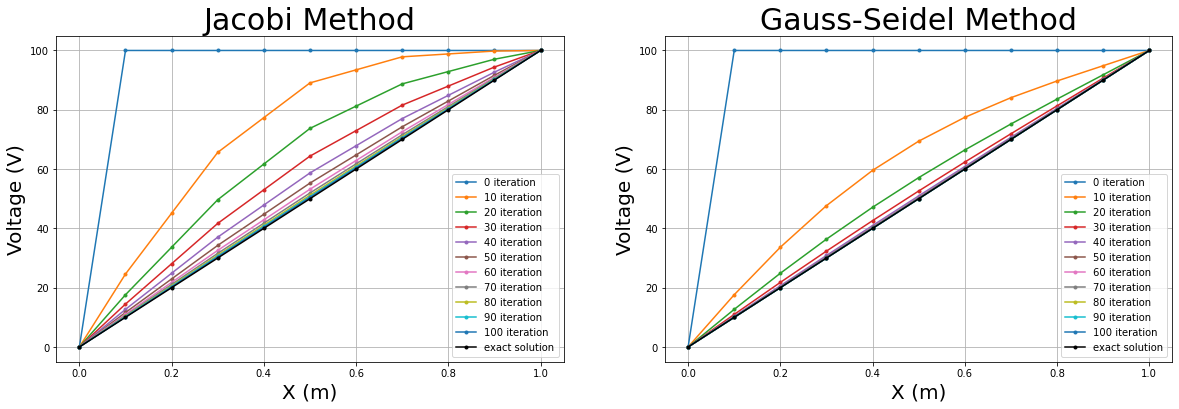

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,6), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, v in enumerate(Vi):
        if i != 0 and i != len(Vi)-1:
            Vf[i] = 0.5 * (Vi[i-1] + Vi[i+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, v in enumerate(Vi):
        if i != 0 and i != len(Vi)-1:
            Vf[i] = 0.5 * (Vi[i-1] + Vi[i+1])
    return Vf

V_a = 0
V_b = 100

num = 11
X = np.linspace(0,1,num)
V1 = np.array([V_a])
V1 = np.append(V1,np.ones(num-2)*100)
V1 = np.append(V1,V_b)
V2 = np.array([V_a])
V2 = np.append(V2,np.ones(num-2)*100)
V2 = np.append(V2,V_b)

N = 101
for i in range(N):
    if i % 10 == 0:
        ax[0].plot(X,V1,'.-', label = str(i) + ' iteration')
        ax[1].plot(X,V2,'.-', label = str(i) + ' iteration')
    V1 = I1(V1)
    V2 = I2(V2)
ax[0].plot(X,X*100,'.-',label = 'exact solution', color = 'k')
ax[1].plot(X,X*100,'.-',label = 'exact solution', color = 'k')

ax[0].legend()
ax[0].grid()
ax[1].legend()
ax[1].grid()

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Voltage (V)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Voltage (V)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30);

plt.savefig('P1.pdf')

We can observe the convergence speed of Gauss-Seidel method is faster than Jacobi method from the above figures.

## Tasks: Contour plots (equipotentials) and electric field 

* Write a program to compute $V$ in a rectangular domain with Dirichlet boundary conditions. 
* Allow the potentials on all four sides to be specified arbitrarily. 
* The number of grid point can be changed.
* Use Jacobi method or Gauss-Seidel method.
* Use some good initial guess.
* Plot the equipotentials.
* Plot the electric fields.

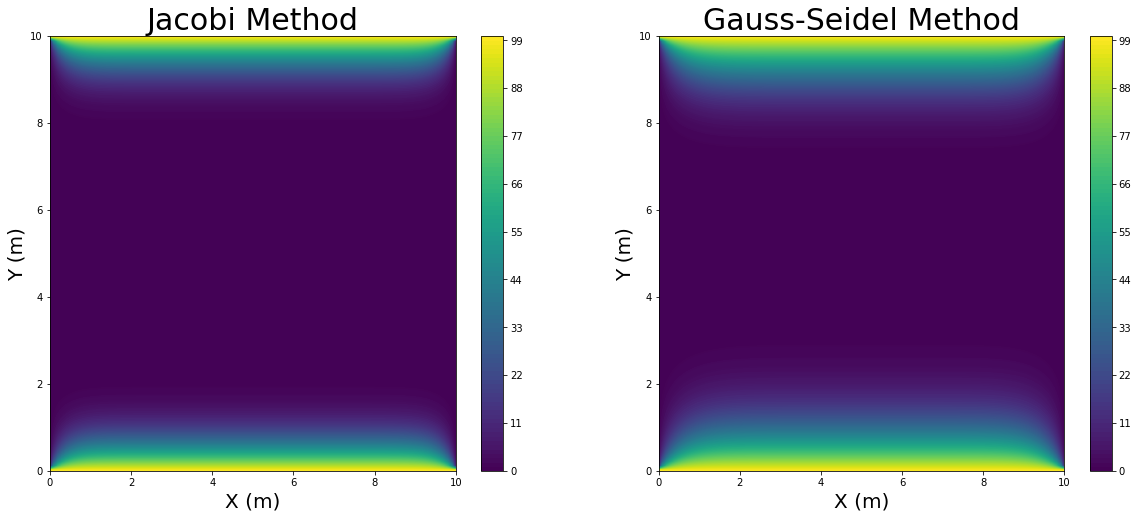

In [3]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

num = 101

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)
V1 = V1.T
V1[0][:] = np.full(num,100)
V1[num-1][:] = np.full(num,100)

V2 = np.zeros((num,num))
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)
V2 = V2.T
V2[0][:] = np.full(num,100)
V2[num-1][:] = np.full(num,100)


N = 111
for i in range(N):
    V1 = I1(V1)
    V2 = I2(V2)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30);

plt.savefig('P2.pdf')

## Tasks: Adding charges

* Modify your code to allow point charges to be placed at arbitrary mesh points.

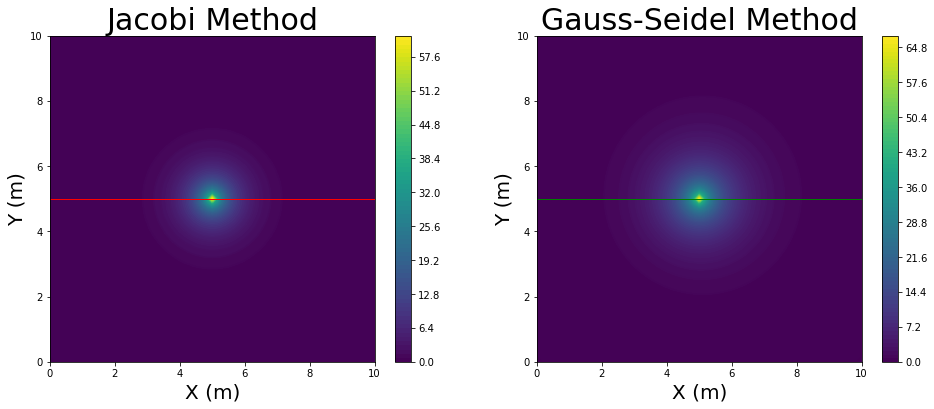

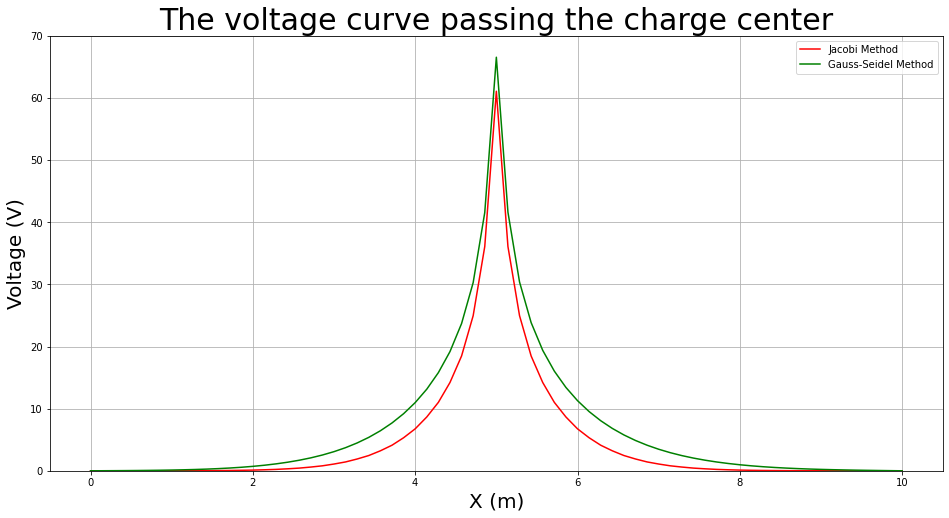

In [5]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,6), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                if i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/2):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] + 100)
                else:
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                if i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/2):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] + 100)
                else:
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

num = 71

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)
V1 = V1.T
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)

V2 = np.zeros((num,num))
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)
V2 = V2.T
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)

N = 151
for i in range(N):
    V1 = I1(V1)
    V2 = I2(V2)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)
ax[0].plot(x,np.full(len(x),max(x)/2), color = 'r', linewidth = 1)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
ax[1].plot(x,np.full(len(x),max(x)/2), color = 'g', linewidth = 1)

fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30)

plt.savefig('P3.pdf')
fig2, ax2 = plt.subplots(figsize = (16,8))
ax2.plot(x, V1[int((len(V1)-1)/2)][:], label = 'Jacobi Method', color = 'r');
ax2.plot(x, V2[int((len(V1)-1)/2)][:], label = 'Gauss-Seidel Method', color = 'g');

ax2.set_xlabel('X (m)', fontsize = 20)
ax2.set_ylabel('Voltage (V)', fontsize = 20)
ax2.set_title('The voltage curve passing the charge center',fontsize = 30)
ax2.set_ylim((0,70))
ax2.grid()
ax2.legend();

plt.savefig('P4.pdf')

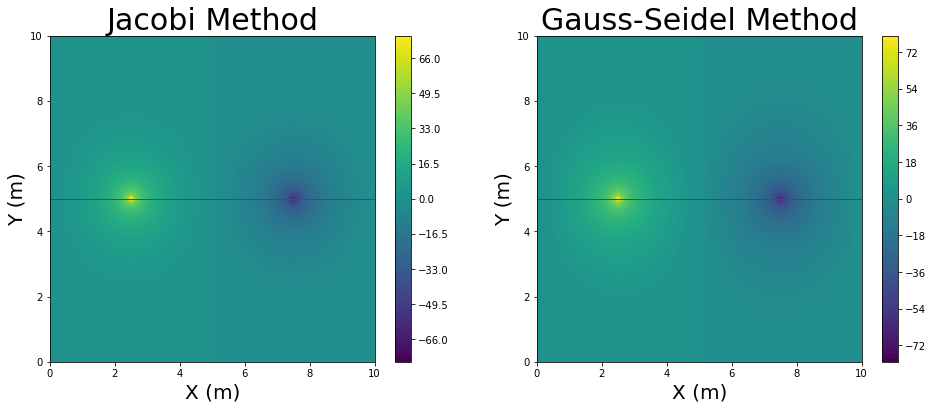

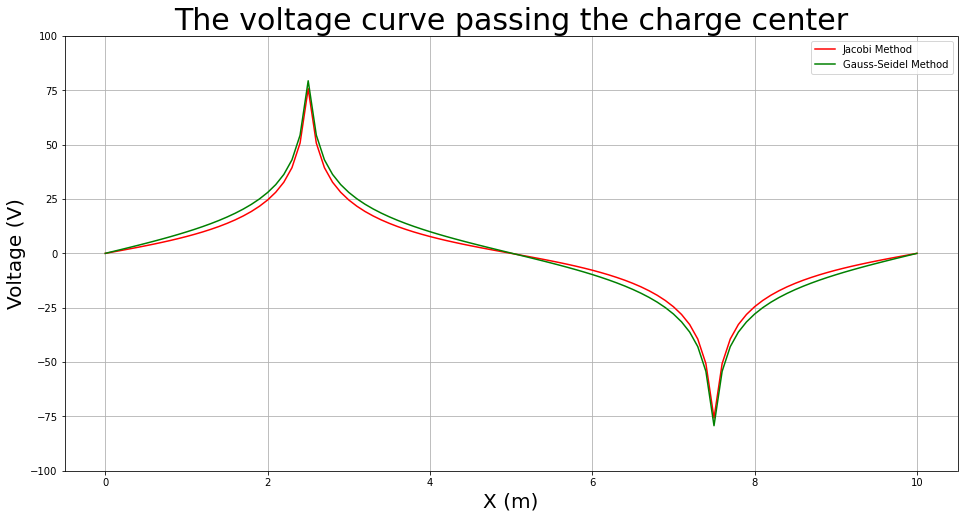

In [6]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,6), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                if i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/4):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] + 100)
                elif i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/4*3):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] - 100)
                else:
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                if i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/4):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] + 100)
                elif i == int((len(Vi)-1)/2) and j == int((len(Vi[i])-1)/4*3):
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1] - 100)
                else:
                    Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

num = 101

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)
V1 = V1.T
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)


V2 = np.zeros((num,num))
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)
V2 = V2.T
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)


N = 1001
for i in range(N):
    V1 = I1(V1)
    V2 = I2(V2)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)
ax[0].plot(x,np.full(len(x),max(x)/2), color = 'r', linewidth = 1)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
ax[1].plot(x,np.full(len(x),max(x)/2), color = 'g', linewidth = 1)

fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30)

plt.savefig('P5.pdf')

fig2, ax2 = plt.subplots(figsize = (16,8))
ax2.plot(x, V1[int((len(V1)-1)/2)][:], label = 'Jacobi Method', color = 'r');
ax2.plot(x, V2[int((len(V1)-1)/2)][:], label = 'Gauss-Seidel Method', color = 'g');

ax2.set_xlabel('X (m)', fontsize = 20)
ax2.set_ylabel('Voltage (V)', fontsize = 20)
ax2.set_title('The voltage curve passing the charge center',fontsize = 30)
ax2.set_ylim((-100,100))
ax2.grid()
ax2.legend();

plt.savefig('P6.pdf')

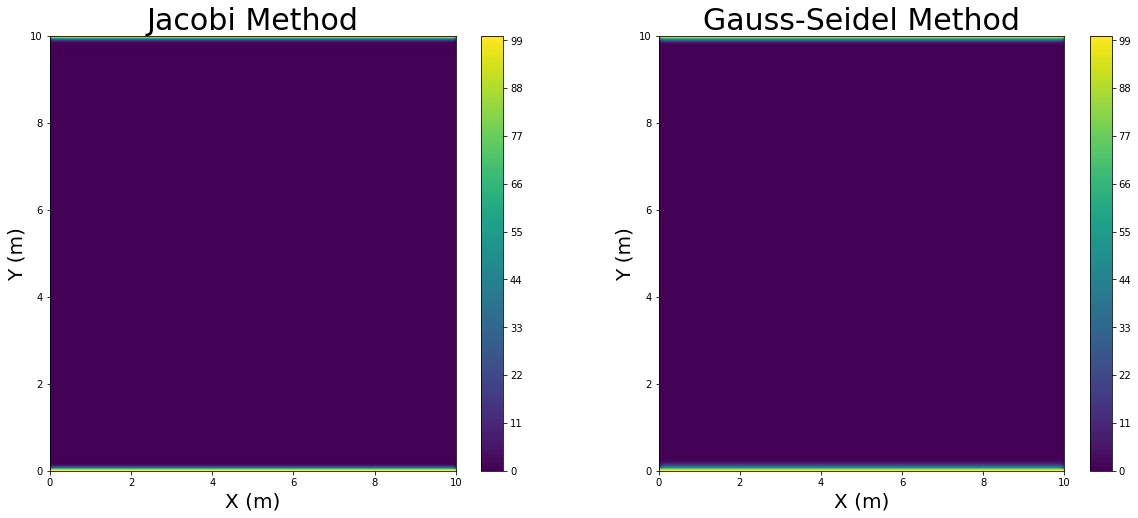

In [5]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

num = 401

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)


V1 = np.zeros((num,num))
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)
V1 = V1.T
V1[0][:] = np.full(num,100)
V1[num-1][:] = np.full(num,100)

V2 = np.zeros((num,num))
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)
V2 = V2.T
V2[0][:] = np.full(num,100)
V2[num-1][:] = np.full(num,100)


N = 11
for i in range(N):
    V1 = I1(V1)
    V2 = I2(V2)

cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30);

## Rectangle

Consider the 2D Laplace equation
$$
  \frac{\partial^2 u(x,y)}{\partial x^2} + \frac{\partial^2 u(x,y)}{\partial y^2} = 0 
$$

within the domain $0 \le x \le a$ and $0\le y \le b$,
and with boundary conditions
* $u(x,0)=0$
* $u(x,b)=0$
* $u(a,y)=0$
* $u(0,y)=f(y)$.

The solution is
$$
  u(x,y)=\sum_{n=1}^{\infty} B_n 
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$
where
$$
  B_n = \frac{2}{b\sinh[n\pi a/b]} \int_0^b f(y)   \sin\left[ n \pi \frac{y}{b} \right] dy
$$

For the case where $f(y)=u_0$
$$
  u(x,y)=\sum_{n \text{odd}}
  \frac{4u_0}{n\pi\sinh[n\pi a/b]}
  \sinh\left[ n \pi \frac{a-x}{b} \right] 
  \sin\left[ n \pi \frac{y}{b} \right],
$$

In [6]:
import numpy as np
a = 1
b = 1
u0 = 1

x = 0.5
y = 0.5

u = 0
for n in range(1,10,2):
    Bn = 4*u0/(n*np.pi*np.sinh(n*np.pi*a/b))
    u = u + Bn
    print(n, Bn, u)
print(u)

1 0.11024922334358528 0.11024922334358528
3 6.849987845380739e-05 0.11031772322203909
5 7.675175958502865e-08 0.11031779997379867
7 1.0237822541632676e-10 0.1103178000761769
9 1.4869981228579678e-13 0.1103178000763256
0.1103178000763256


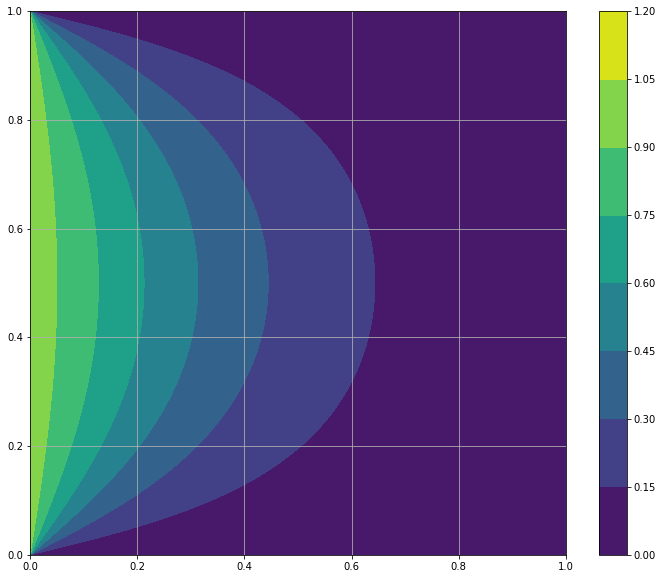

In [7]:
import numpy as np
a = 1
b = 1
u0 = 1

x = np.linspace(0, 1, 1001)
y = np.linspace(0, 1, 1001)
X, Y = np.meshgrid(x, y)
U = np.zeros_like(X)

for n in range(1,200,2):
    Bn = 4*u0/(n*np.pi*np.sinh(n*np.pi*a/b))
    U = U + Bn*np.sinh(n*np.pi*(a-X)/b)*np.sin(n*np.pi*Y/b)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contourf(X, Y, U)
fig.colorbar(CS)

ax.grid()

In [1]:
def M1(N, num):
    V1 = np.zeros((num,num))
    V1[0,:] = 0
    V1[num-1,:] = 0
    V1[:,0] = 100
    V1[:,num-1] = 100
    for i in range(N):
        V1 = I1(V1)

In [9]:
%timeit M1(100,10)

11.5 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit M1(100,20)

53 ms ± 528 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%timeit M1(100,30)

124 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit M1(100,40)

225 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit M1(100,50)

363 ms ± 8.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit M1(100,60)

516 ms ± 9.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit M1(100,70)

648 ms ± 7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit M1(100,80)

866 ms ± 6.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit M1(100,90)

1.08 s ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit M1(100,100)

1.33 s ± 6.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


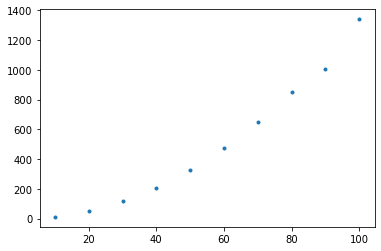

In [19]:
x = [10,20,30,40,50,60,70,80,90,100]
T = [11.4,51.3,120,208,329,475,649,851,1008,1340]
fig, ax = plt.subplots()
ax.plot(x,T,'.')

[[100. 100. 100. ... 100. 100. 100.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


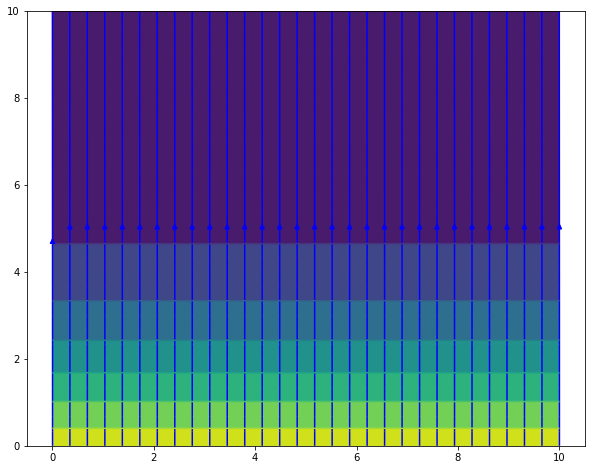

In [57]:
fig, ax = plt.subplots(figsize = (10,8))
N = 1000
num = 100
V1 = np.zeros((num,num))
V1[0,:] = 100
print(V1)
for i in range(N):
    for j in range(1,num-1):
        for k in range(num):
            if k == 0:
                V1[j,k] = 0.25*(V1[j,-1] + V1[j,k+1] + V1[j-1,k] + V1[j+1,k])
            elif k == num -1:
                V1[j,k] = 0.25*(V1[j,k-1] + V1[j,0] + V1[j-1,k] + V1[j+1,k])
            else:
                V1[j,k] = 0.25*(V1[j,k-1] + V1[j,k+1] + V1[j-1,k] + V1[j+1,k])
x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)
Ex, Ey = np.gradient(-V1)

ax.streamplot(x, y, Ey, Ex, color='b')
ax.contour(X,Y,V1)
ax.contourf(X,Y,V1)

Using different method to plot.

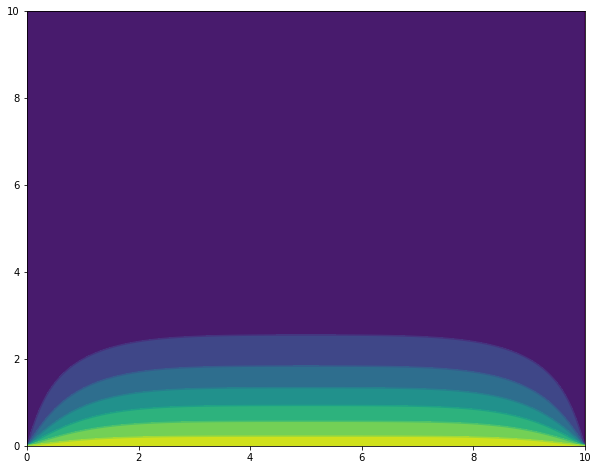

In [53]:
fig, ax = plt.subplots(figsize = (10,8))
N = 10000
num = 400
V1 = np.zeros((num,num))
V1[0,:] = 100
for i in range(N):
    V2 = 0.25*(V1[1:num-1,0:num-2]+V1[1:num-1,2:num]+V1[0:num-2,1:num-1]+V1[2:num,1:num-1])
    V1[1:num-1,1:num-1] = V2
x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

ax.contour(X,Y,V1)
ax.contourf(X,Y,V1)

In [8]:
def M2(N, num):
    V1 = np.zeros((num,num))
    V1[0,:] = 100
    for i in range(N):
        for j in range(1,num-1):
            for k in range(1,num-1):
                V1[j,k] = 0.25*(V1[j,k-1] + V1[j,k+1] + V1[j-1,k] + V1[j+1,k])

def M3(N,num):
    V1 = np.zeros((num,num))
    V1[0,:] = 100
    for i in range(N):
        V1[1:num-1,1:num-1] = 0.25*(V1[1:num-1,0:num-2]+V1[1:num-1,2:num]+V1[0:num-2,1:num-1]+V1[2:num,1:num-1])

Compare the speed of three methods.

M1 is the normal one.

M2 is like M1 but has less calculation.

M3 uses the shift method.

In [9]:
%timeit M1(100,100)
%timeit M2(100,100)
%timeit M3(100,100)

1.68 s ± 47.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
723 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.98 ms ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


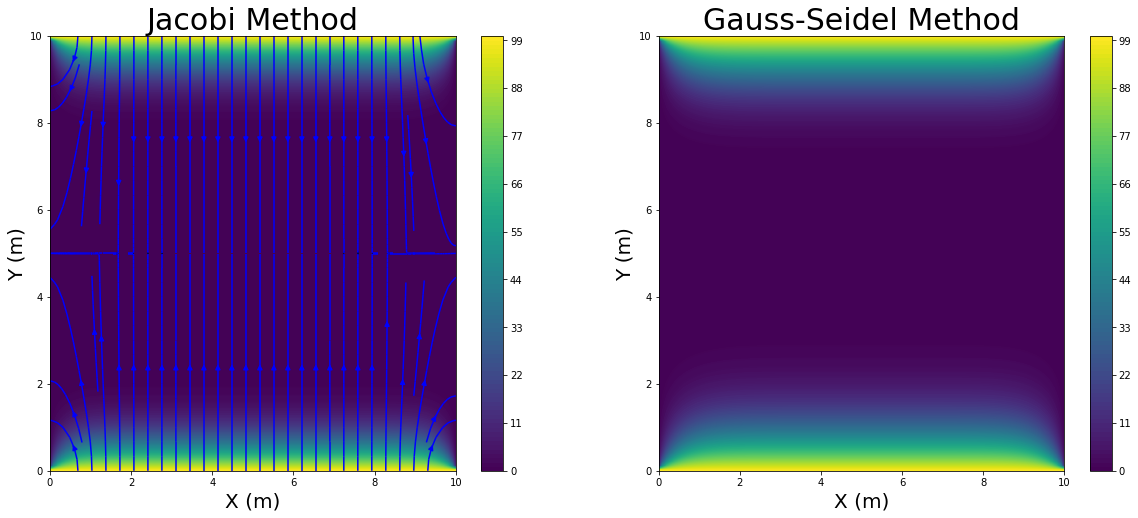

In [55]:
# for contour plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8), ncols = 2)

def I1(Vi):
    Vf = np.array(Vi)
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

def I2(Vi):
    Vf = Vi
    for i, vx in enumerate(Vi):
        for j, vy in enumerate(Vi[i]):
            if i != 0 and i != len(Vi)-1 and j != 0 and j != len(Vi[i])-1:
                Vf[i][j] = 0.25 * (Vi[i-1][j] + Vi[i+1][j] + Vi[i][j-1] + Vi[i][j+1])
    return Vf

num = 101

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = np.zeros((num,num))
V1[0][:] = np.full(num,0)
V1[num-1][:] = np.full(num,0)
V1 = V1.T
V1[0][:] = np.full(num,100)
V1[num-1][:] = np.full(num,100)

V2 = np.zeros((num,num))
V2[0][:] = np.full(num,0)
V2[num-1][:] = np.full(num,0)
V2 = V2.T
V2[0][:] = np.full(num,100)
V2[num-1][:] = np.full(num,100)


N = 111
for i in range(N):
    V1 = I1(V1)
    V2 = I2(V2)

Ex, Ey = np.gradient(-V1)
cs1 = ax[0].contour(X, Y, V1, levels = 100)
cs1 = ax[0].contourf(X, Y, V1, levels = 100)

cs2 = ax[1].contour(X, Y, V2, levels = 100)
cs2 = ax[1].contourf(X, Y, V2, levels = 100)
fig.colorbar(cs1,ax=ax[0])
fig.colorbar(cs2,ax=ax[1]);

ax[0].set_xlabel('X (m)', fontsize = 20)
ax[0].set_ylabel('Y (m)', fontsize = 20)
ax[0].set_title('Jacobi Method',fontsize = 30)
ax[0].streamplot(x, y, Ey, Ex, color='b')

ax[1].set_xlabel('X (m)', fontsize = 20)
ax[1].set_ylabel('Y (m)', fontsize = 20)
ax[1].set_title('Gauss-Seidel Method', fontsize = 30);